#### Finding insights from the dataset, Amazon_best_sellers_June_2021.

#### Task:
- The main aim of this project is to explore the dataset Amazon_best_sellers_June_2021,make general findings related to it create visualizations and identify the top selling products for the month of June 2021.

#### Project Outline
This project includes the following steps 
- Reading and Cleaning of data,
- Exploratory Data Analysis(EDA),
- Statistical Analysis,
- Data Visualization and
- Observations(Insights gotten from the Amazon_Seller dataset)

In [1]:
#Importing useful libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1.  Data aquisition and Data cleaning

In [2]:
#Reading data using pandas library
dataset = pd.read_csv('Amazon_Best_Seller_2021.csv')

In [3]:
dataset

,ASIN,Category,Product Link,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1 Sellers,#1,4.7,"640,721",$39.99
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1 Sellers,#2,4.7,"854,114",$34.99
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1 Sellers,#3,4.7,"267,821",$44.99
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27 Sellers,#4,4.8,"114,267",$28.48
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1 Sellers,#5,4.7,"267,821",$49.99
...,...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,https://www.amazon.com/gp/offer-listing/B007DW...,10 Sellers,#95,4.6,"8,795",$6.99
703,B01N16VX79,Toys & Games,https://www.amazon.com/gp/offer-listing/B01N16...,5 Sellers,#96,4.7,649,$16.99
704,B09197N995,Toys & Games,https://www.amazon.com/gp/offer-listing/B09197...,1 Sellers,#97,4.8,"9,121",$8.99
705,B015CCR1FW,Toys & Games,https://www.amazon.com/gp/offer-listing/B015CC...,26 Sellers,#98,4.7,"18,449",$19.99


    DETAILS:
    The dataset above shows Amazon's top 100 selling products in June 2021.

- Checking for empty spaces within the dataset

In [4]:
dataset.isnull().sum()

ASIN             0
Category         0
Product Link     0
No of Sellers    0
Rank             0
Rating           0
Reviews Count    0
Price            0
dtype: int64

- Eliminating commas from the Price column

In [5]:
dataset['Reviews Count'] = dataset['Reviews Count'].replace(',','',regex = True)

In [6]:
data_clean = dataset.drop('Product Link',axis = 1)

In [7]:
data_clean

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,1 Sellers,#1,4.7,640721,$39.99
1,B07FZ8S74R,Electronics,1 Sellers,#2,4.7,854114,$34.99
2,B07XJ8C8F5,Electronics,1 Sellers,#3,4.7,267821,$44.99
3,B07WVFCVJN,Electronics,27 Sellers,#4,4.8,114267,$28.48
4,B08YT2N5SX,Electronics,1 Sellers,#5,4.7,267821,$49.99
...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,10 Sellers,#95,4.6,8795,$6.99
703,B01N16VX79,Toys & Games,5 Sellers,#96,4.7,649,$16.99
704,B09197N995,Toys & Games,1 Sellers,#97,4.8,9121,$8.99
705,B015CCR1FW,Toys & Games,26 Sellers,#98,4.7,18449,$19.99


- Eliminating the $ sign

In [8]:
data_clean['Price'] = data_clean['Price'].str.replace('$','',regex = True)

In [9]:
data_clean

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,1 Sellers,#1,4.7,640721,39.99
1,B07FZ8S74R,Electronics,1 Sellers,#2,4.7,854114,34.99
2,B07XJ8C8F5,Electronics,1 Sellers,#3,4.7,267821,44.99
3,B07WVFCVJN,Electronics,27 Sellers,#4,4.8,114267,28.48
4,B08YT2N5SX,Electronics,1 Sellers,#5,4.7,267821,49.99
...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,10 Sellers,#95,4.6,8795,6.99
703,B01N16VX79,Toys & Games,5 Sellers,#96,4.7,649,16.99
704,B09197N995,Toys & Games,1 Sellers,#97,4.8,9121,8.99
705,B015CCR1FW,Toys & Games,26 Sellers,#98,4.7,18449,19.99


In [10]:
data_clean['No of Sellers'] = data_clean['No of Sellers'].str.replace('Sellers','',regex = True)

In [11]:
data_clean

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,1,#1,4.7,640721,39.99
1,B07FZ8S74R,Electronics,1,#2,4.7,854114,34.99
2,B07XJ8C8F5,Electronics,1,#3,4.7,267821,44.99
3,B07WVFCVJN,Electronics,27,#4,4.8,114267,28.48
4,B08YT2N5SX,Electronics,1,#5,4.7,267821,49.99
...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,10,#95,4.6,8795,6.99
703,B01N16VX79,Toys & Games,5,#96,4.7,649,16.99
704,B09197N995,Toys & Games,1,#97,4.8,9121,8.99
705,B015CCR1FW,Toys & Games,26,#98,4.7,18449,19.99


In [12]:
data_clean['Rank'] = data_clean['Rank'].str.replace('#','',regex = True)

In [13]:
data_clean

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,1,1,4.7,640721,39.99
1,B07FZ8S74R,Electronics,1,2,4.7,854114,34.99
2,B07XJ8C8F5,Electronics,1,3,4.7,267821,44.99
3,B07WVFCVJN,Electronics,27,4,4.8,114267,28.48
4,B08YT2N5SX,Electronics,1,5,4.7,267821,49.99
...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,10,95,4.6,8795,6.99
703,B01N16VX79,Toys & Games,5,96,4.7,649,16.99
704,B09197N995,Toys & Games,1,97,4.8,9121,8.99
705,B015CCR1FW,Toys & Games,26,98,4.7,18449,19.99


- Converting data from String to Integer-type

In [14]:
data_clean['Rank'] = data_clean['Rank'].astype(int)
data_clean['No of Sellers'] = data_clean['No of Sellers'].astype(int)
data_clean['Price'] = data_clean['Price'].astype(float)
data_clean['Reviews Count'] = data_clean['Reviews Count'].astype(float)


In [15]:
data_clean

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,1,1,4.7,640721.0,39.99
1,B07FZ8S74R,Electronics,1,2,4.7,854114.0,34.99
2,B07XJ8C8F5,Electronics,1,3,4.7,267821.0,44.99
3,B07WVFCVJN,Electronics,27,4,4.8,114267.0,28.48
4,B08YT2N5SX,Electronics,1,5,4.7,267821.0,49.99
...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,10,95,4.6,8795.0,6.99
703,B01N16VX79,Toys & Games,5,96,4.7,649.0,16.99
704,B09197N995,Toys & Games,1,97,4.8,9121.0,8.99
705,B015CCR1FW,Toys & Games,26,98,4.7,18449.0,19.99


In [16]:
data_clean['Rank'].sum()

36309

In [17]:
data_clean['Category'].value_counts()

Electronics                  147
Gift Cards                   100
Camera & Photo               100
Clothing, Shoes & Jewelry    100
Toys & Games                  95
Video Games                   95
Books                         70
Name: Category, dtype: int64

In [19]:
pd.set_option('display.max_row',10)

In [20]:
data_clean

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,1,1,4.7,640721.0,39.99
1,B07FZ8S74R,Electronics,1,2,4.7,854114.0,34.99
2,B07XJ8C8F5,Electronics,1,3,4.7,267821.0,44.99
3,B07WVFCVJN,Electronics,27,4,4.8,114267.0,28.48
4,B08YT2N5SX,Electronics,1,5,4.7,267821.0,49.99
...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,10,95,4.6,8795.0,6.99
703,B01N16VX79,Toys & Games,5,96,4.7,649.0,16.99
704,B09197N995,Toys & Games,1,97,4.8,9121.0,8.99
705,B015CCR1FW,Toys & Games,26,98,4.7,18449.0,19.99


#### 3. Exploratory Data Analysis(EDA)
- In this section the following questions will be answered;

1. What are the number of unique product IDs

In [21]:
data_clean['ASIN'].value_counts()

B095NWYQBC    3
B081RJ8DW1    3
B08F6L6HVP    2
B079RKX5ZL    2
B07CCGBB7M    2
             ..
B07HJHK8Y5    1
B017SD8RWO    1
B01CDCG4KM    1
B08KHCR1YF    1
B07SK4W1VJ    1
Name: ASIN, Length: 653, dtype: int64

2. What were the different categories of Amazon products sold?.

In [22]:
data_clean['Category'].value_counts()

Electronics                  147
Gift Cards                   100
Camera & Photo               100
Clothing, Shoes & Jewelry    100
Toys & Games                  95
Video Games                   95
Books                         70
Name: Category, dtype: int64

3. Which of the product category had the the highest number of ProductIDs?. 

Text(0.5, 1.0, 'Number of products IDs per Product category')

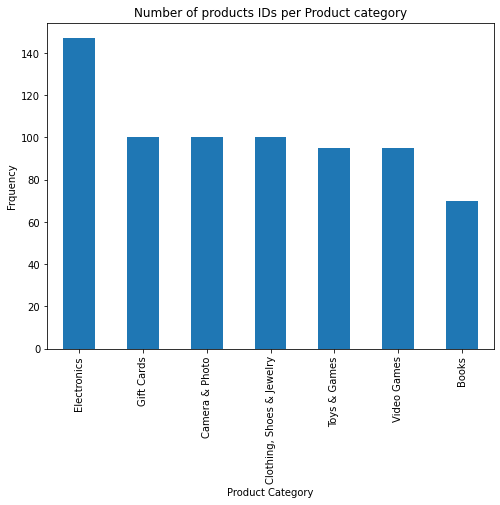

In [74]:
plt.figure(figsize = (8,6))
data_clean['Category'].value_counts().plot(kind = 'bar')
plt.xlabel('Product Category')
plt.ylabel('Frquency')
plt.title('Number of products IDs per Product category')

4. What was the total revenue generated by Amazon for the month of June 2021.

In [24]:
data_clean = data_clean.rename(columns = {'Price':'Price($)'})

In [25]:
data_clean['TotalIncome($)'] = data_clean['Price($)']*data_clean['Reviews Count']

In [26]:
data_clean

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price($),TotalIncome($)
0,B079QHML21,Electronics,1,1,4.7,640721.0,39.99,25622432.79
1,B07FZ8S74R,Electronics,1,2,4.7,854114.0,34.99,29885448.86
2,B07XJ8C8F5,Electronics,1,3,4.7,267821.0,44.99,12049266.79
3,B07WVFCVJN,Electronics,27,4,4.8,114267.0,28.48,3254324.16
4,B08YT2N5SX,Electronics,1,5,4.7,267821.0,49.99,13388371.79
...,...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,10,95,4.6,8795.0,6.99,61477.05
703,B01N16VX79,Toys & Games,5,96,4.7,649.0,16.99,11026.51
704,B09197N995,Toys & Games,1,97,4.8,9121.0,8.99,81997.79
705,B015CCR1FW,Toys & Games,26,98,4.7,18449.0,19.99,368795.51


In [27]:
Revenew_total = data_clean['TotalIncome($)'].sum()

In [28]:
Revenew_total

2806170921.17

5. Which of these categories contributed the most to Amazon total revenue in June 2021

In [29]:
grouped = data_clean.groupby('Category')['TotalIncome($)'].sum()

In [30]:
grouped.sort_values(ascending = False)

Category
Gift Cards                   1.643129e+09
Electronics                  8.970396e+08
Video Games                  1.388568e+08
Clothing, Shoes & Jewelry    4.765449e+07
Camera & Photo               3.399050e+07
Toys & Games                 2.661365e+07
Books                        1.888677e+07
Name: TotalIncome($), dtype: float64

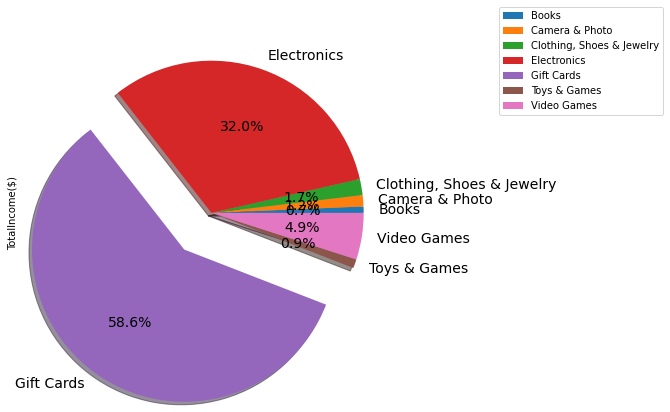

In [31]:
plt.figure(figsize = (9,7))

explode = [0]*7
explode[4] = 0.3
grouped.plot(kind = 'pie',explode = explode,autopct = '%1.1f%%',shadow = True,fontsize = 14 )
plt.legend(loc = 'right',bbox_to_anchor = (1,0.25,0.7,1.3))

In [32]:
grouped

Category
Books                        1.888677e+07
Camera & Photo               3.399050e+07
Clothing, Shoes & Jewelry    4.765449e+07
Electronics                  8.970396e+08
Gift Cards                   1.643129e+09
Toys & Games                 2.661365e+07
Video Games                  1.388568e+08
Name: TotalIncome($), dtype: float64

5. What were the productIDs with frequency above 2.

In [33]:
Freq_above2 = data_clean['ASIN'].value_counts()

In [34]:
Freq_above2 [Freq_above2>=2]

B095NWYQBC    3
B081RJ8DW1    3
B08F6L6HVP    2
B079RKX5ZL    2
B07CCGBB7M    2
             ..
B08YKGZF7P    2
B0148NNKTC    2
B07TWFVDWT    2
B07HZJ64WD    2
B087RKKXM5    2
Name: ASIN, Length: 52, dtype: int64

In [75]:
grou = data_clean.groupby('ASIN')['TotalIncome($)'].sum()


In [76]:
grou

ASIN
080241270X    394224.60
1250080401    577483.46
1250178606    854142.03
125019623X    132140.01
1250304458     17310.49
                ...    
B097CJZ9TL      4045.47
B097H17CVQ    128395.65
B097ZMX6ZC      9760.96
B097ZZCJFX     16717.65
B0982B1F1J    129809.89
Name: TotalIncome($), Length: 653, dtype: float64

6. What is the productID with the maximum TotalIncome?.

In [36]:
data_clean[data_clean['TotalIncome($)' ] == data_clean['TotalIncome($)' ].max() ]

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price($),TotalIncome($)
248,B07TMNGSN4,Gift Cards,1,2,4.8,721690.0,50.0,36084500.0
249,B004LLIKVU,Gift Cards,1,3,4.8,721690.0,50.0,36084500.0
250,B07PCMWTSG,Gift Cards,1,4,4.8,721690.0,50.0,36084500.0
253,B07WYVVM9G,Gift Cards,1,7,4.8,721690.0,50.0,36084500.0
255,B01FIS88SY,Gift Cards,1,9,4.8,721690.0,50.0,36084500.0
...,...,...,...,...,...,...,...,...
327,B07J54KYP1,Gift Cards,1,81,4.8,721690.0,50.0,36084500.0
334,B07CG4DYNH,Gift Cards,1,88,4.8,721690.0,50.0,36084500.0
340,B07D3P511R,Gift Cards,1,94,4.8,721690.0,50.0,36084500.0
341,B06X6HSVDY,Gift Cards,1,95,4.8,721690.0,50.0,36084500.0


7. What is the category of the product with maximum number of reviews?.

In [37]:
group2 = data_clean.groupby('Category')['Reviews Count'].sum()

In [38]:
group2

Category
Books                         1812958.0
Camera & Photo                 721754.0
Clothing, Shoes & Jewelry     2868554.0
Electronics                  11309903.0
Gift Cards                   33486769.0
Toys & Games                  1680303.0
Video Games                   2562960.0
Name: Reviews Count, dtype: float64

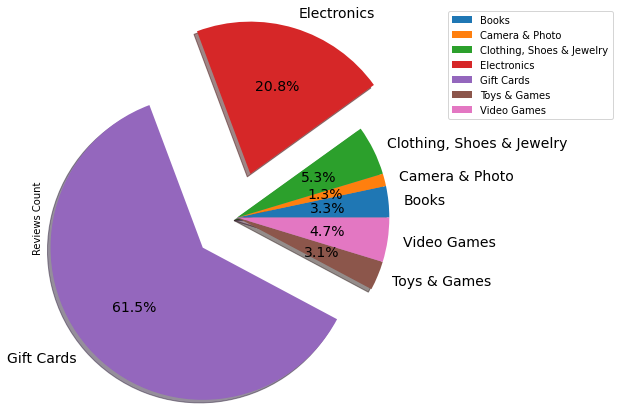

In [39]:
plt.figure(figsize = (9,7))
explode = [0]*7
explode[3] = 0.3
explode[4] = 0.3

group2.plot(kind = 'pie',explode = explode, autopct = '%1.1f%%', shadow = True,fontsize = 14)
plt.legend(loc = 'right',bbox_to_anchor = (1,0.4,0.5,1))

8. Which of the productIDs had the max number of sellers?.

In [40]:
data_clean[data_clean['No of Sellers' ] == data_clean['No of Sellers' ].max() ]

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price($),TotalIncome($)
452,B07VGRJDFY,Video Games,214,39,4.9,84166.0,299.99,25248958.34
486,B07XV4NHHN,Video Games,214,74,4.8,22209.0,48.00,1066032.00


In [41]:
group3 = data_clean.groupby('Category')['No of Sellers'].sum()

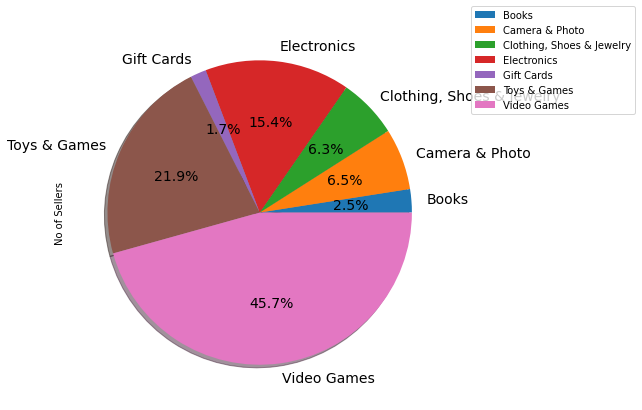

In [42]:
plt.figure(figsize = (9,7))
explode = [0]*7
explode[3] = 0.3
explode[4] = 0.3

group3.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True,fontsize = 14)
plt.legend(loc = 'right',bbox_to_anchor = (1,0.4,0.5,1))

In [43]:
gro_1 = data_clean.groupby('Category').get_group('Electronics')

In [44]:
gro_1

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price($),TotalIncome($)
0,B079QHML21,Electronics,1,1,4.7,640721.0,39.99,25622432.79
1,B07FZ8S74R,Electronics,1,2,4.7,854114.0,34.99,29885448.86
2,B07XJ8C8F5,Electronics,1,3,4.7,267821.0,44.99,12049266.79
3,B07WVFCVJN,Electronics,27,4,4.8,114267.0,28.48,3254324.16
4,B08YT2N5SX,Electronics,1,5,4.7,267821.0,49.99,13388371.79
...,...,...,...,...,...,...,...,...
142,B0758L64L9,Electronics,1,96,4.6,23741.0,199.99,4747962.59
143,B08N5LNQCX,Electronics,5,97,4.8,6599.0,899.00,5932501.00
144,B079RKX5ZL,Electronics,12,98,4.8,21383.0,12.99,277765.17
145,B08F58MXQG,Electronics,1,99,4.8,4617.0,19.99,92293.83


9. what is the  productID of the electronic product with the maximum reviews

In [45]:
gro_1[gro_1['Reviews Count'] == gro_1['Reviews Count'].max() ]

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price($),TotalIncome($)
1,B07FZ8S74R,Electronics,1,2,4.7,854114.0,34.99,29885448.86
18,B07W95GZNH,Electronics,1,20,4.7,854114.0,34.99,29885448.86


10.  what is the  productID of the electronic product with the max TotalIcome?.

In [46]:
gro_1[gro_1['TotalIncome($)'] == gro_1['TotalIncome($)'].max() ]

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price($),TotalIncome($)
1,B07FZ8S74R,Electronics,1,2,4.7,854114.0,34.99,29885448.86
18,B07W95GZNH,Electronics,1,20,4.7,854114.0,34.99,29885448.86


11. what is the productID of the product with the max TotalIcome?.


In [47]:
data_clean[data_clean['Reviews Count'] == data_clean['Reviews Count'].max()]

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price($),TotalIncome($)
1,B07FZ8S74R,Electronics,1,2,4.7,854114.0,34.99,29885448.86
18,B07W95GZNH,Electronics,1,20,4.7,854114.0,34.99,29885448.86


In [48]:
data_clean[data_clean['Reviews Count'] == data_clean['Reviews Count'].min()]

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price($),TotalIncome($)
459,B088CK6GP1,Video Games,7,46,5.0,1.0,49.94,49.94


12. How many of these products had reviews count above 1000?.

In [49]:
dat = data_clean[data_clean['Reviews Count'] >= 1000]

In [77]:
(len(dat)/len(data_clean))*100

90.94766619519095

In [51]:
len(data_clean)

707

- From above, about 91% of the products had reviews counts above 1000.

### 3. Statistical analysis

In [72]:
data_clean.describe()

,No of Sellers,Rank,Rating,Reviews Count,Price($),TotalIncome($)
count,707.000000,707.000000,707.000000,707.000000,707.000000,7.070000e+02
mean,8.333805,51.356436,4.593494,77005.942008,55.686351,3.969124e+06
std,20.699360,28.661702,0.284117,178407.465321,88.580862,9.222754e+06
min,1.000000,1.000000,1.400000,1.000000,0.880000,3.992000e+01
25%,1.000000,27.000000,4.500000,5138.000000,13.990000,1.265318e+05
50%,1.000000,52.000000,4.700000,18023.000000,25.990000,3.623500e+05
75%,5.000000,75.500000,4.800000,49593.500000,50.000000,1.558800e+06
max,214.000000,100.000000,5.000000,854114.000000,899.000000,3.608450e+07


- From the statistics above , it is observed that the minimum number of sellers for a particular product was 1 and the maximum was 214.
- Also the minimum price at which a product was sold was 88cents and the maximum price was $899.

# 4. Data Visualization

In [52]:
cor = data_clean.corr()
print(cor)

                No of Sellers      Rank    Rating  Reviews Count  Price($)  \
No of Sellers        1.000000  0.003025  0.107523      -0.097749  0.125485   
Rank                 0.003025  1.000000 -0.040416      -0.119950  0.121938   
Rating               0.107523 -0.040416  1.000000       0.218048  0.026729   
Reviews Count       -0.097749 -0.119950  0.218048       1.000000 -0.020218   
Price($)             0.125485  0.121938  0.026729      -0.020218  1.000000   
TotalIncome($)      -0.048694 -0.068520  0.202363       0.945915  0.191563   

                TotalIncome($)  
No of Sellers        -0.048694  
Rank                 -0.068520  
Rating                0.202363  
Reviews Count         0.945915  
Price($)              0.191563  
TotalIncome($)        1.000000  


<AxesSubplot:>

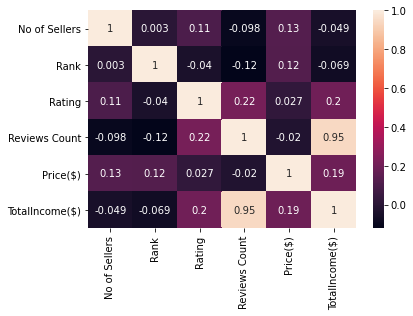

In [53]:
sns.heatmap(cor, annot = True)

OBSERVATION:
From the heatmap above ,there exist a strong correlation between Reviews counts and Total Income,Reviews counts and rating

Text(0.5, 1.0, 'Reviews counts for the different product categories')

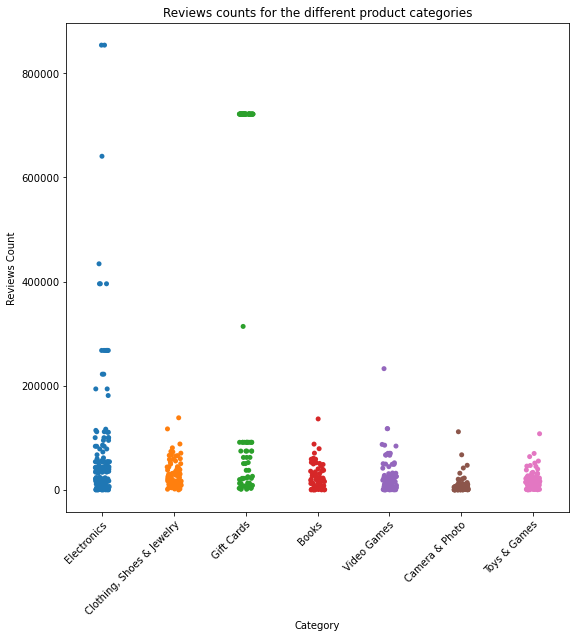

In [54]:
plt.figure(figsize = (9,9))
sns.stripplot(x = 'Category',y = 'Reviews Count',data = data_clean)
plt.xticks( rotation = 45,ha = 'right',rotation_mode = 'anchor')
plt.title('Reviews counts for the different product categories')

OBSERVATION:
From the above stripplot it is seen that Electronics products had the highest number of reviews(above 600000) followed by Gift cards and Video games while toys and Games,Camera & photos ,clothing,shoes and jewellry had the least number of reviews(below 2000000).

<AxesSubplot:>

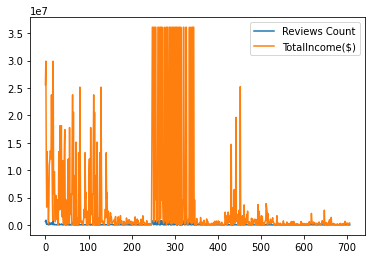

In [55]:
data_clean[['Reviews Count','TotalIncome($)']].plot(kind = 'line')

11. Determine the total number of reviews for products that had only one seller and number of reviews for products that had more than one seller.

In [56]:
df_oneseller = data_clean[data_clean['No of Sellers'] == 1]

In [57]:
df_oneseller['Reviews Count'].sum()

47130254.0

In [58]:
df_moreseller = data_clean[data_clean['No of Sellers'] > 1]

In [59]:
df_moreseller['Reviews Count'].sum()

7312947.0

From the above findings, it shows that products that were sold by only one seller had the maximum number of reviews.

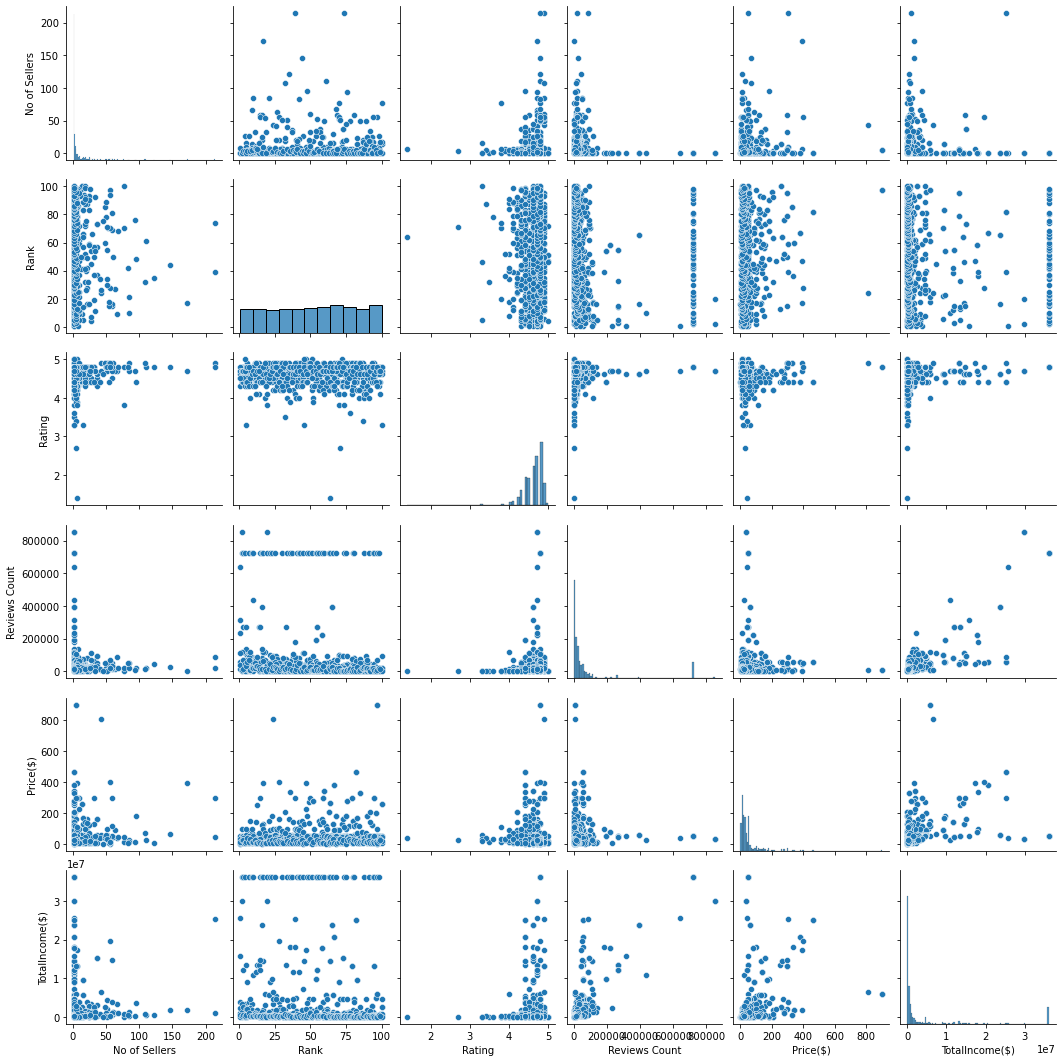

In [60]:
sns.pairplot(data_clean)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Electronics'),
  Text(1, 0, 'Clothing, Shoes & Jewelry'),
  Text(2, 0, 'Gift Cards'),
  Text(3, 0, 'Books'),
  Text(4, 0, 'Video Games'),
  Text(5, 0, 'Camera & Photo'),
  Text(6, 0, 'Toys & Games')])

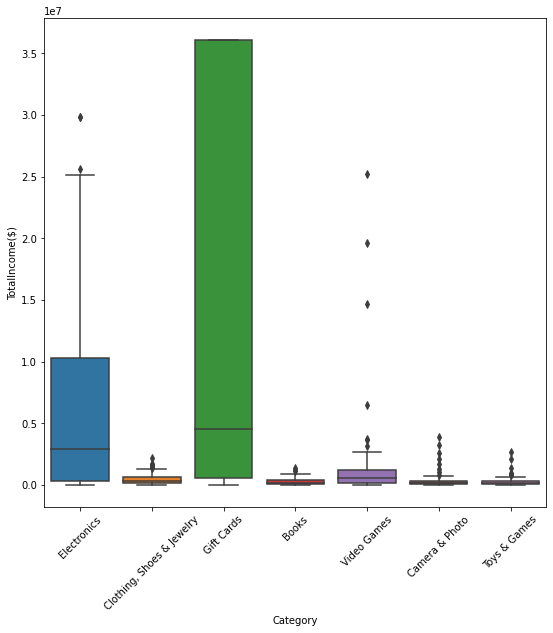

In [61]:
plt.figure(figsize = (9,9))
sns.boxplot(x = 'Category',y = 'TotalIncome($)',data = data_clean)
plt.xticks(rotation = 45)

OBSERVATION:
From the above box plot it is observed that the median of total income for the Gift Cards is the largest as compare to those  of the other product category and followed by the median of total income for the Electronics products.

- Variation of reviews count with total income.

Text(0.5, 1.0, 'Variation of reviews with total income')

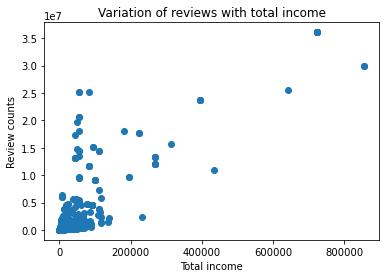

In [62]:
plt.scatter(data_clean['Reviews Count'],data_clean['TotalIncome($)'])
plt.ylabel('Review counts')
plt.xlabel('Total income')
plt.title('Variation of reviews with total income')

12. Which  product category had the high rating values

Text(0.5, 1.0, 'Product rating')

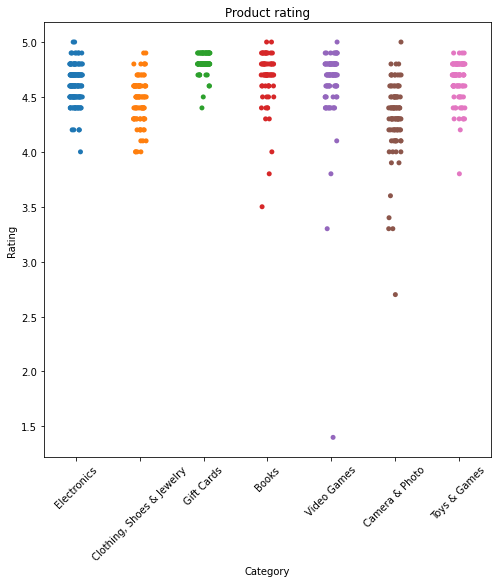

In [63]:
plt.figure(figsize = (8,8))
sns.stripplot(x= 'Category',y = 'Rating',data = data_clean)
plt.xticks(rotation = 45)
plt.title('Product rating')

From above, Electronics,Gift Cards, Clothing,shoes & Jewelry had only high rating values,4.0 - 5, 4.5 - 5.0, 4.0 - 4.9 repectively.

In [64]:
group_3 = data_clean.groupby('Category')['Rating'].value_counts()

<AxesSubplot:xlabel='Rating', ylabel='Reviews Count'>

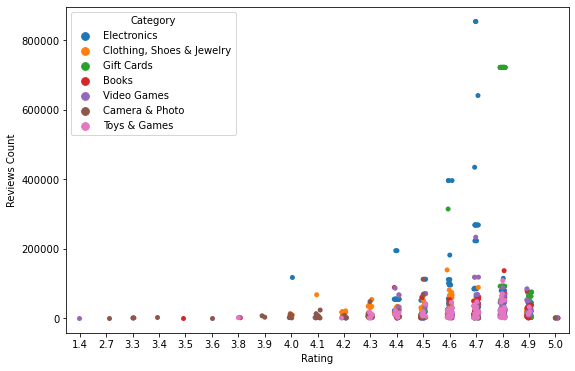

In [65]:
plt.figure(figsize = (9,6))
sns.stripplot(x = 'Rating' ,y = 'Reviews Count',hue = 'Category',data = data_clean)

13. Identify the productIDs of the products with rating greater or equal to 4.

In [66]:
data_clean[data_clean['Rating'] == data_clean['Rating'].max() ]

,ASIN,Category,No of Sellers,Rank,Rating,Reviews Count,Price($),TotalIncome($)
49,B095NWYQBC,Electronics,1,51,5.0,4.0,9.98,39.92
98,B095NWYQBC,Electronics,1,51,5.0,4.0,9.98,39.92
389,1684510821,Books,1,47,5.0,47.0,18.57,872.79
407,1611806860,Books,1,72,5.0,3.0,13.49,40.47
459,B088CK6GP1,Video Games,7,46,5.0,1.0,49.94,49.94
515,B095NWYQBC,Camera & Photo,1,4,5.0,4.0,9.98,39.92


 The table above shows the different product that were rated 5 and despite the fact that they were rated high the had minimum numbers of reviews.

In [ ]:
data_clean['Rating'].max()

#  Observations

1. In June 2021 Amazon sold out 707 of its' products.

2. The products were of the following categories: Electronics(147),Camera&Photos(100),Clothing,Shoes&Jewelry(100)
 Video games(95),Gift cards(100),Toy&Games(95) and Books(70).
 
3. It was also aboserved that Gift cards had the highest number of reviews(61.5% of the total reviews) and contributed the most to the total revenew(58.6% of total income) and followed by Electronics products with 20.8% of total reviews and contributed 32.0% of the total revenue.Camera & Photos had the least number of reviews, 1.3% of total reviews and contributed 0.4% of the total revenue.

4.  Gift cards had the least number of sellers(1.7% of total sellers) but contributed the most to the total revenue while Video games had the maximum number of sellers(45.7%) but contributed only 3.1% of the total revenue. But in the case of Electronics products,
there were more sellers(15.4% of sellers) and also they made a great contribution to the total revenue(20.8%).

5. From the above findings it shows that products that were sold by single sellers had the maximum number of reviews as compared to those that were sold by multiple sellers.

6. B07FZ8S74R and B07W95GZNH are the Electronics products that had the maximum number of reviews and contributed the maximum percent of totalIncome.
7. B088CK6GP1 is Video game product that had the maximum rating.
8. It was also observed that there was a strong correlation between Reviews and the total revenue. 


### Future work
- Here is just a proposal,I hope it will be of help to someone. I will be very grateful if you can  go through this and be able to comment on my errors for i am just a beginner as far as Data sciences is concerned.
- Proper visualization and findings still have to be done on this dataset. 

# References

- Dataset:https://www.kaggle.com/hussainaliarif/amazon-best-seller-june-2021-products

In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/abehsongkiss/data-analytics-project2-amazon-best-seller-2021


'https://jovian.ai/abehsongkiss/data-analytics-project2-amazon-best-seller-2021'